In [1]:
import numpy as np
import pandas as pd


/home/tung-hoang/.virtualenvs/yolo-cv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tung-hoang/.virtualenvs/yolo-cv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train = pd.read_csv('./train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('./test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.shape

(891, 12)

"Survived" is the dependent variable in this case. First, we need to check if there's missing data

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
nans = train.shape[0] - train.dropna().shape[0]
nans

708

In [8]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [9]:
#!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

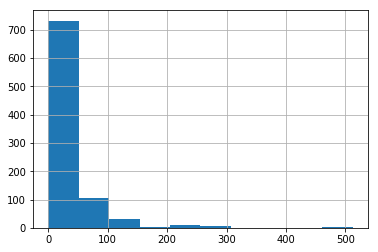

In [10]:
# The variable "Fare" is skewed right => have to log trainsform 
# to get an approximate normal distribution
train.Fare.hist()

In [11]:
# Combine train and test data for cleaning
alldata = pd.concat([train, test])
alldata.shape

/home/tung-hoang/.virtualenvs/yolo-cv/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(1309, 12)

In [12]:
#!pip install seaborn
import seaborn as sns

/home/tung-hoang/.virtualenvs/yolo-cv/lib/python3.5/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/tung-hoang/.virtualenvs/yolo-cv/lib/python3.5/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


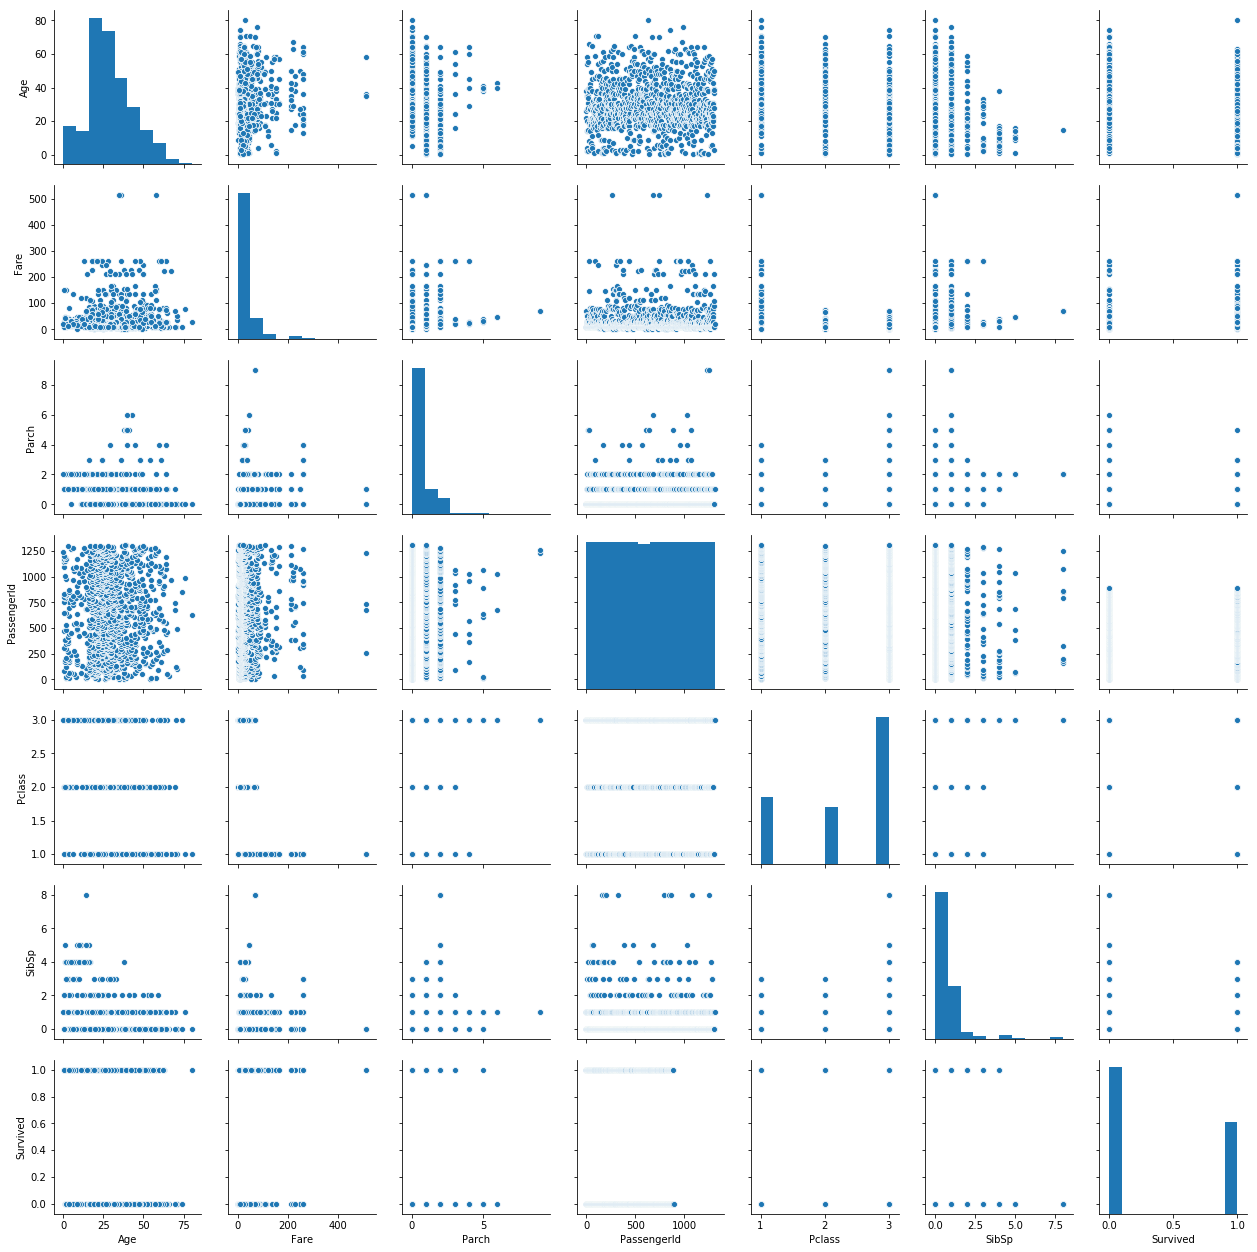

In [13]:
sns.pairplot(alldata)

In [14]:
alldata.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [15]:
alldata.reset_index()

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [16]:
# df.apply(lambda x: [1, 2], axis=1)
alldata['Title'] = alldata['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())
alldata


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs


In [17]:
alldata['Ticket']

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
5                  330877
6                   17463
7                  349909
8                  347742
9                  237736
10                PP 9549
11                 113783
12              A/5. 2151
13                 347082
14                 350406
15                 248706
16                 382652
17                 244373
18                 345763
19                   2649
20                 239865
21                 248698
22                 330923
23                 113788
24                 349909
25                 347077
26                   2631
27                  19950
28                 330959
29                 349216
              ...        
388                364858
389                349909
390                 12749
391              PC 17592
392             C.A. 2673
393            C.A. 30769
394                315153
395         

# Impute missing values

In [18]:
# Mode value of "Age" is 24, while median is 28. I decide to impute with median
print("Median: ", alldata.Age.median())
alldata.Age.value_counts(sort=True)
alldata.Age.fillna(28, inplace=True)

Median:  28.0


In [19]:
# Check if "Age" has been imputed
alldata.Age.isna().sum()

0

In [20]:
alldata.shape

(1309, 13)

In [21]:
alldata[alldata['Embarked'].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs


In [22]:
#Remove rows containing NA from Embarked
alldata = alldata[~alldata['Embarked'].isna()]

In [23]:
alldata.shape

(1307, 13)

In [24]:
alldata.Fare.isnull().sum()

1

In [45]:
# Impute "Fare" with median value
print("Median Fare: ", alldata.Fare.median())
alldata.Fare.value_counts(sort=True)
replace = alldata.Fare.median()
alldata.Fare.fillna(replace, inplace=True)

Median Fare:  2.737880811060884


/home/tung-hoang/.virtualenvs/yolo-cv/lib/python3.5/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [46]:
alldata.Fare.isnull().sum()

0

In [27]:
alldata.Cabin.fillna("Miss", inplace=True)

In [28]:
alldata.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,Miss,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,Miss,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,Miss,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [29]:
alldata.Fare.min()

0.0

In [30]:
# Log transform "Fare"
alldata['Fare'] = np.log(alldata.Fare+1)


/home/tung-hoang/.virtualenvs/yolo-cv/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


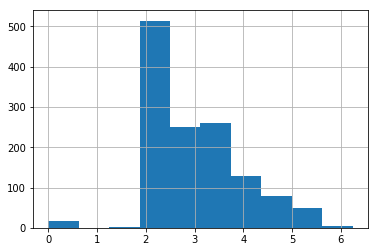

In [31]:
alldata.Fare.hist()

In [32]:
# Since "Parch" 9 only appear in test data twice, I decide to impute "Parch" 9 by mode value 0
alldata.Parch.value_counts()
alldata[alldata.Parch == 9]['Parch']

342    9
365    9
Name: Parch, dtype: int64

In [33]:
alldata[alldata.Parch == 9]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
342,28.0,Miss,S,4.256322,"Sage, Mr. John George",9,1234,3,male,1,NaN,CA. 2343,Mr
365,28.0,Miss,S,4.256322,"Sage, Mrs. John (Annie Bullen)",9,1257,3,female,1,NaN,CA. 2343,Mrs


In [48]:
alldata.loc[365, "Parch"] = 0

/home/tung-hoang/.virtualenvs/yolo-cv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [49]:
alldata[alldata.Parch == 9]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title


In [50]:
alldata

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,Miss,S,2.110213,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,4.280593,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,Miss,S,2.188856,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,3.990834,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,Miss,S,2.202765,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr
5,28.0,Miss,Q,2.246893,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr
6,54.0,E46,S,3.967694,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr
7,2.0,Miss,S,3.094446,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master
8,27.0,Miss,S,2.495954,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs
9,14.0,Miss,C,3.436268,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs


In [52]:
train = alldata[~alldata['Survived'].isna()]
train.shape

(889, 13)

In [53]:
y_train = train.Survived
y_train


0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
5      0.0
6      0.0
7      0.0
8      1.0
9      1.0
10     1.0
11     1.0
12     0.0
13     0.0
14     0.0
15     1.0
16     0.0
17     1.0
18     0.0
19     1.0
20     0.0
21     1.0
22     1.0
23     1.0
24     0.0
25     1.0
26     0.0
27     0.0
28     1.0
29     0.0
      ... 
861    0.0
862    1.0
863    0.0
864    0.0
865    1.0
866    1.0
867    0.0
868    0.0
869    1.0
870    0.0
871    1.0
872    0.0
873    0.0
874    1.0
875    1.0
876    0.0
877    0.0
878    0.0
879    1.0
880    1.0
881    0.0
882    0.0
883    0.0
884    0.0
885    0.0
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 889, dtype: float64

In [54]:
X_train = train.drop(columns=['Survived', 'Cabin', 'Embarked', 'Name', 'PassengerId', 'Sex', 'Ticket', 'Title'])
X_train

,Age,Fare,Parch,Pclass,SibSp
0,22.0,2.110213,0,3,1
1,38.0,4.280593,0,1,1
2,26.0,2.188856,0,3,0
3,35.0,3.990834,0,1,1
4,35.0,2.202765,0,3,0
5,28.0,2.246893,0,3,0
6,54.0,3.967694,0,1,0
7,2.0,3.094446,1,3,3
8,27.0,2.495954,2,3,0
9,14.0,3.436268,0,2,1


In [55]:
test = alldata[alldata['Survived'].isna()]
test.shape

(418, 13)

In [56]:
y_test = test.Survived
y_test

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
388   NaN
389   NaN
390   NaN
391   NaN
392   NaN
393   NaN
394   NaN
395   NaN
396   NaN
397   NaN
398   NaN
399   NaN
400   NaN
401   NaN
402   NaN
403   NaN
404   NaN
405   NaN
406   NaN
407   NaN
408   NaN
409   NaN
410   NaN
411   NaN
412   NaN
413   NaN
414   NaN
415   NaN
416   NaN
417   NaN
Name: Survived, Length: 418, dtype: float64

In [57]:
X_test = test.drop(columns=['Survived', 'Cabin', 'Embarked', 'Name', 'PassengerId', 'Sex', 'Ticket', 'Title'])
X_test

,Age,Fare,Parch,Pclass,SibSp
0,34.5,2.178064,0,3,0
1,47.0,2.079442,0,3,1
2,62.0,2.369075,0,2,0
3,27.0,2.268252,0,3,0
4,22.0,2.586824,1,3,1
5,14.0,2.324836,0,3,0
6,30.0,2.155152,0,3,0
7,26.0,3.401197,1,2,1
8,18.0,2.107689,0,3,0
9,21.0,3.224858,0,3,2


In [43]:
from sklearn.linear_model import LogisticRegression


/home/tung-hoang/.virtualenvs/yolo-cv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tung-hoang/.virtualenvs/yolo-cv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [44]:
clf = LogisticRegression()

In [58]:
clf.fit(X_train, y_train)

/home/tung-hoang/.virtualenvs/yolo-cv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [67]:
train = alldata[~alldata['Survived'].isna()]
train.shape

(889, 13)

In [69]:
y = train.Survived
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
5      0.0
6      0.0
7      0.0
8      1.0
9      1.0
10     1.0
11     1.0
12     0.0
13     0.0
14     0.0
15     1.0
16     0.0
17     1.0
18     0.0
19     1.0
20     0.0
21     1.0
22     1.0
23     1.0
24     0.0
25     1.0
26     0.0
27     0.0
28     1.0
29     0.0
      ... 
861    0.0
862    1.0
863    0.0
864    0.0
865    1.0
866    1.0
867    0.0
868    0.0
869    1.0
870    0.0
871    1.0
872    0.0
873    0.0
874    1.0
875    1.0
876    0.0
877    0.0
878    0.0
879    1.0
880    1.0
881    0.0
882    0.0
883    0.0
884    0.0
885    0.0
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 889, dtype: float64

In [70]:
X = train.drop(columns=['Survived', 'Cabin', 'Embarked', 'Name', 'PassengerId', 'Sex', 'Ticket', 'Title'])
X

,Age,Fare,Parch,Pclass,SibSp
0,22.0,2.110213,0,3,1
1,38.0,4.280593,0,1,1
2,26.0,2.188856,0,3,0
3,35.0,3.990834,0,1,1
4,35.0,2.202765,0,3,0
5,28.0,2.246893,0,3,0
6,54.0,3.967694,0,1,0
7,2.0,3.094446,1,3,3
8,27.0,2.495954,2,3,0
9,14.0,3.436268,0,2,1


In [73]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [74]:
clf = LogisticRegression()
clf.fit(X_train_new, y_train_new)

/home/tung-hoang/.virtualenvs/yolo-cv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [122]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test_new)
acc = accuracy_score(np.array(y_test_new), y_pred)
acc
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test_new, y_pred)))

0.7153558052434457

In [124]:
confusion_matrix_1 = confusion_matrix(y_test_new, y_pred)
print(confusion_matrix_1)

[[146  19]
 [ 57  45]]


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79       165
         1.0       0.70      0.44      0.54       102

   micro avg       0.72      0.72      0.72       267
   macro avg       0.71      0.66      0.67       267
weighted avg       0.71      0.72      0.70       267



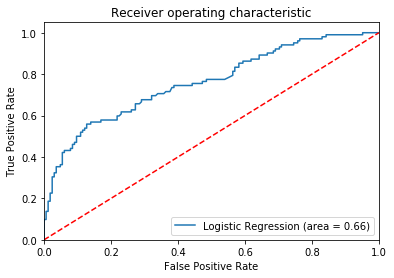

In [130]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_new, y_pred)
fpr, tpr, thresholds = roc_curve(y_test_new, classifier.predict_proba(X_test_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [117]:
from sklearn.ensemble import RandomForestClassifier
# Train the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=500, max_depth=6)
classifier.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
# Make prediction
pred = classifier.predict(X_test_new)
acc2 = accuracy_score(np.array(y_test_new), pred)
acc2

0.7490636704119851

In [120]:
confusion_matrix_2 = confusion_matrix(y_test_new, pred)
print(confusion_matrix_2)

[[142  23]
 [ 44  58]]


In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new, pred))

              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81       165
         1.0       0.72      0.57      0.63       102

   micro avg       0.75      0.75      0.75       267
   macro avg       0.74      0.71      0.72       267
weighted avg       0.75      0.75      0.74       267



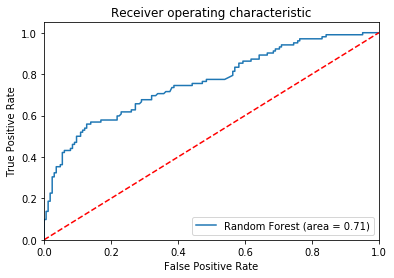

In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_new, pred)
fpr, tpr, thresholds = roc_curve(y_test_new, classifier.predict_proba(X_test_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()